In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage.metrics import mean_squared_error as mse, structural_similarity as ssim

In [112]:
# Load the grayscale image
image_path = "/media/tairo/Storages/CodeThayTien/XLA/ImgTest/OIP.jpeg"
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [113]:
# Define the filters F, G, and H as given
F = np.array([[1, 2, 4, 2, 1]]) / 10
G = np.array([[1], [2], [4], [2], [1]]) / 10
H = np.array([
    [1, 2, 4, 2, 1],
    [2, 4, 8, 4, 2],
    [4, 8, 16, 8, 4],
    [2, 4, 8, 4, 2],
    [1, 2, 4, 2, 1]
]) / 100

Method 1

In [114]:
# Apply horizontal filtering on the grayscale image
Y_filteredF1 = convolve2d(gray_image, F, mode='same', boundary='fill', fillvalue=0)

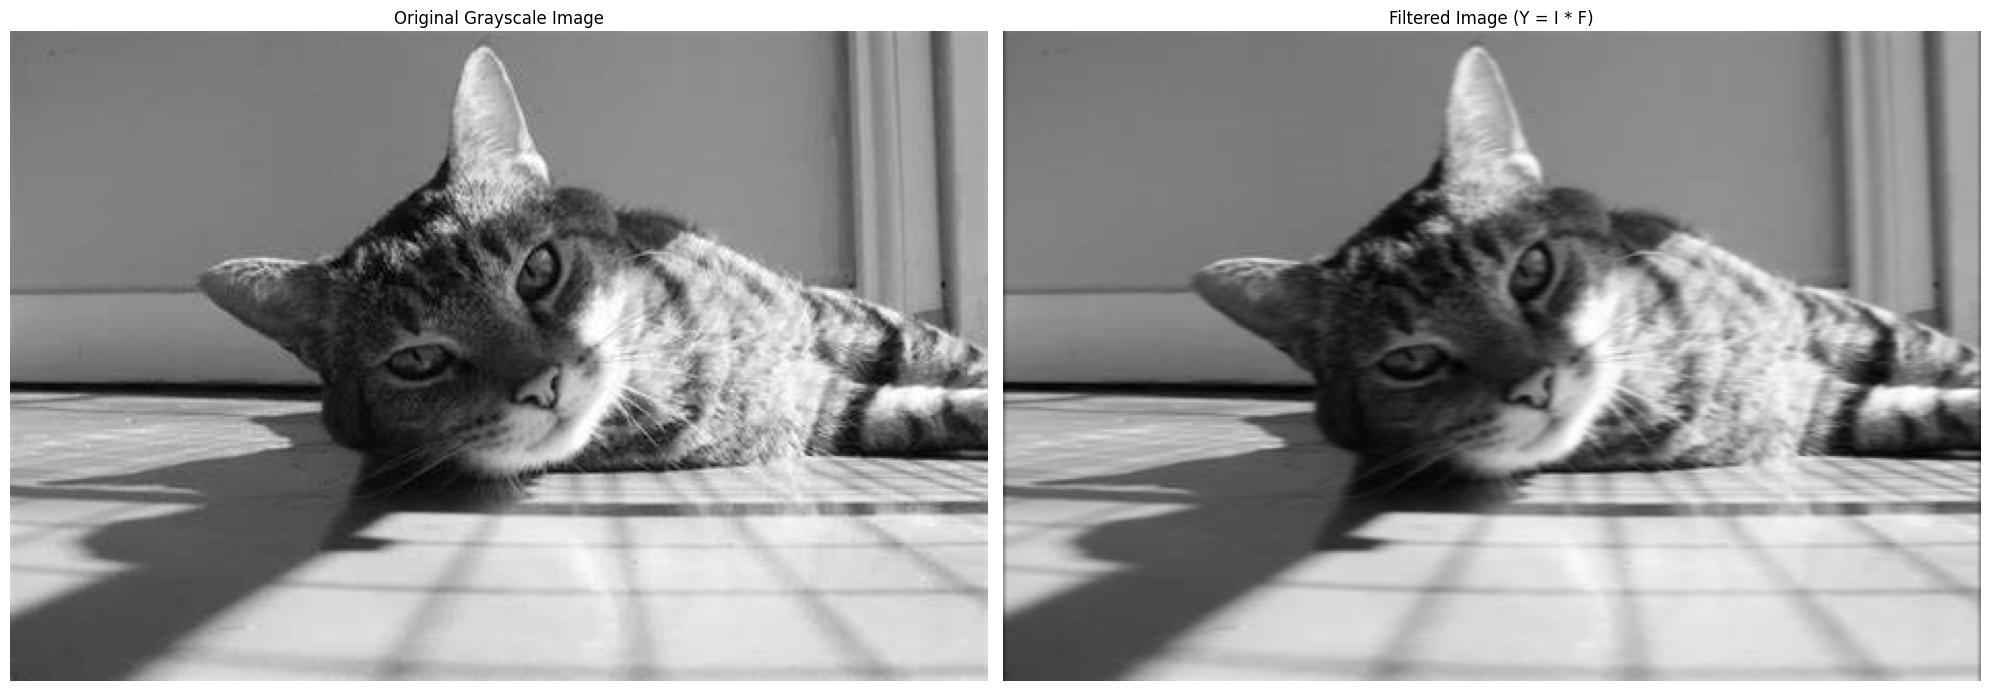

In [115]:
# Display the original and filtered images
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Y_filteredF1, cmap='gray')
plt.title("Filtered Image (Y = I * F)")
plt.axis('off')

plt.tight_layout()
plt.show()

In [116]:
# MSE of original gray imgaes
mean_intensity_original = np.mean(gray_image)
print("Mean intensity of the original image:", mean_intensity_original)
#Mean squared in Filtered image alone
mean_intensity_filtered = np.mean(Y_filteredF1)
print("Mean intensity of the filtered image:", mean_intensity_filtered)

# Calculate MSE (Mean Squared Error)
mse_value = mse(gray_image, Y_filteredF1)
print("MSE (Mean Squared Error) between Original and Filtered Image:", mse_value)

# Calculate SSIM (Structural Similarity Index)
ssim_value, _ = ssim(gray_image, Y_filteredF1, full=True, data_range=gray_image.max() - gray_image.min())
print("SSIM (Structural Similarity Index) between Original and Filtered Image:", ssim_value)

Mean intensity of the original image: 141.4788493737861
Mean intensity of the filtered image: 141.21113254303128
MSE (Mean Squared Error) between Original and Filtered Image: 26.714088406670687
SSIM (Structural Similarity Index) between Original and Filtered Image: 0.9743749729503977


In [117]:
#Apply vertical filtering on the grayscale image
Y_filteredG1 = convolve2d(gray_image, G, mode='same', boundary='fill', fillvalue=0)

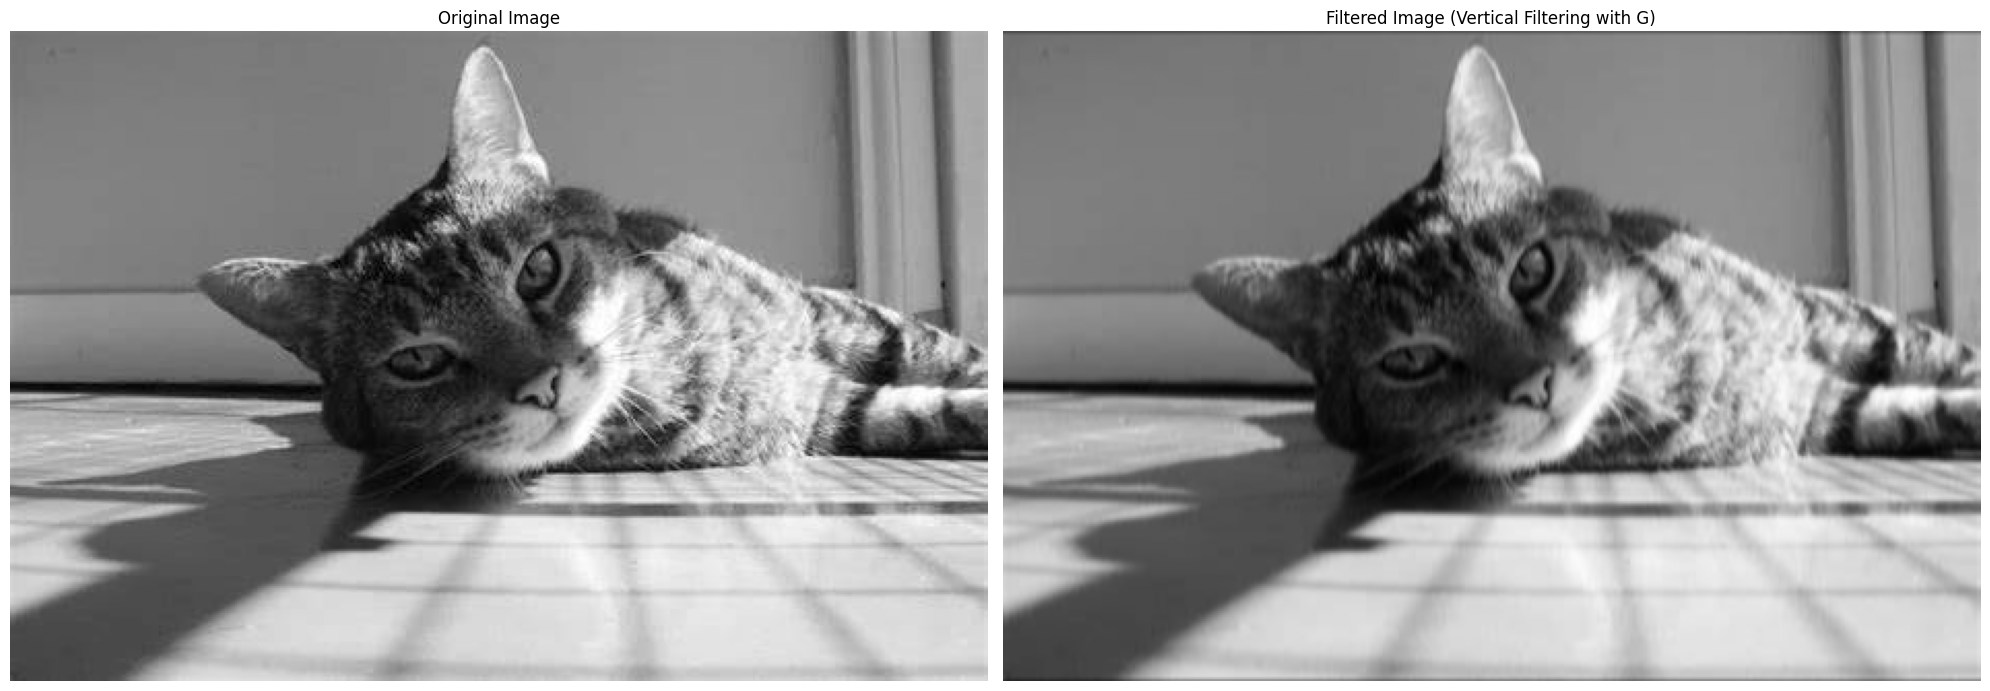

In [118]:
# Display the original and filtered images
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)    
plt.imshow(Y_filteredG1, cmap='gray')
plt.title("Filtered Image (Vertical Filtering with G)")
plt.axis('off')

plt.tight_layout()
plt.show()


In [119]:
# MSE of original gray imgaes
mean_intensity_original = np.mean(gray_image)
print("Mean intensity of the original image:", mean_intensity_original)
#Mean squared in Filtered image alone
mean_intensity_filtered = np.mean(Y_filteredG1)
print("Mean intensity of the filtered image:", mean_intensity_filtered)

# Calculate MSE (Mean Squared Error)
mse_value = mse(gray_image, Y_filteredG1)
print("MSE (Mean Squared Error) between Original and Filtered Image:", mse_value)

# Calculate SSIM (Structural Similarity Index)
ssim_value, _ = ssim(gray_image, Y_filteredG1, full=True, data_range=gray_image.max() - gray_image.min())
print("SSIM (Structural Similarity Index) between Original and Filtered Image:", ssim_value)

Mean intensity of the original image: 141.4788493737861
Mean intensity of the filtered image: 141.07385975487244
MSE (Mean Squared Error) between Original and Filtered Image: 46.93763003147812
SSIM (Structural Similarity Index) between Original and Filtered Image: 0.9539178174752061


Method 2

In [120]:
# Apply the filter H using 2D convolution
Y_filteredH2 = convolve2d(gray_image, H, mode='same', boundary='fill', fillvalue=0)


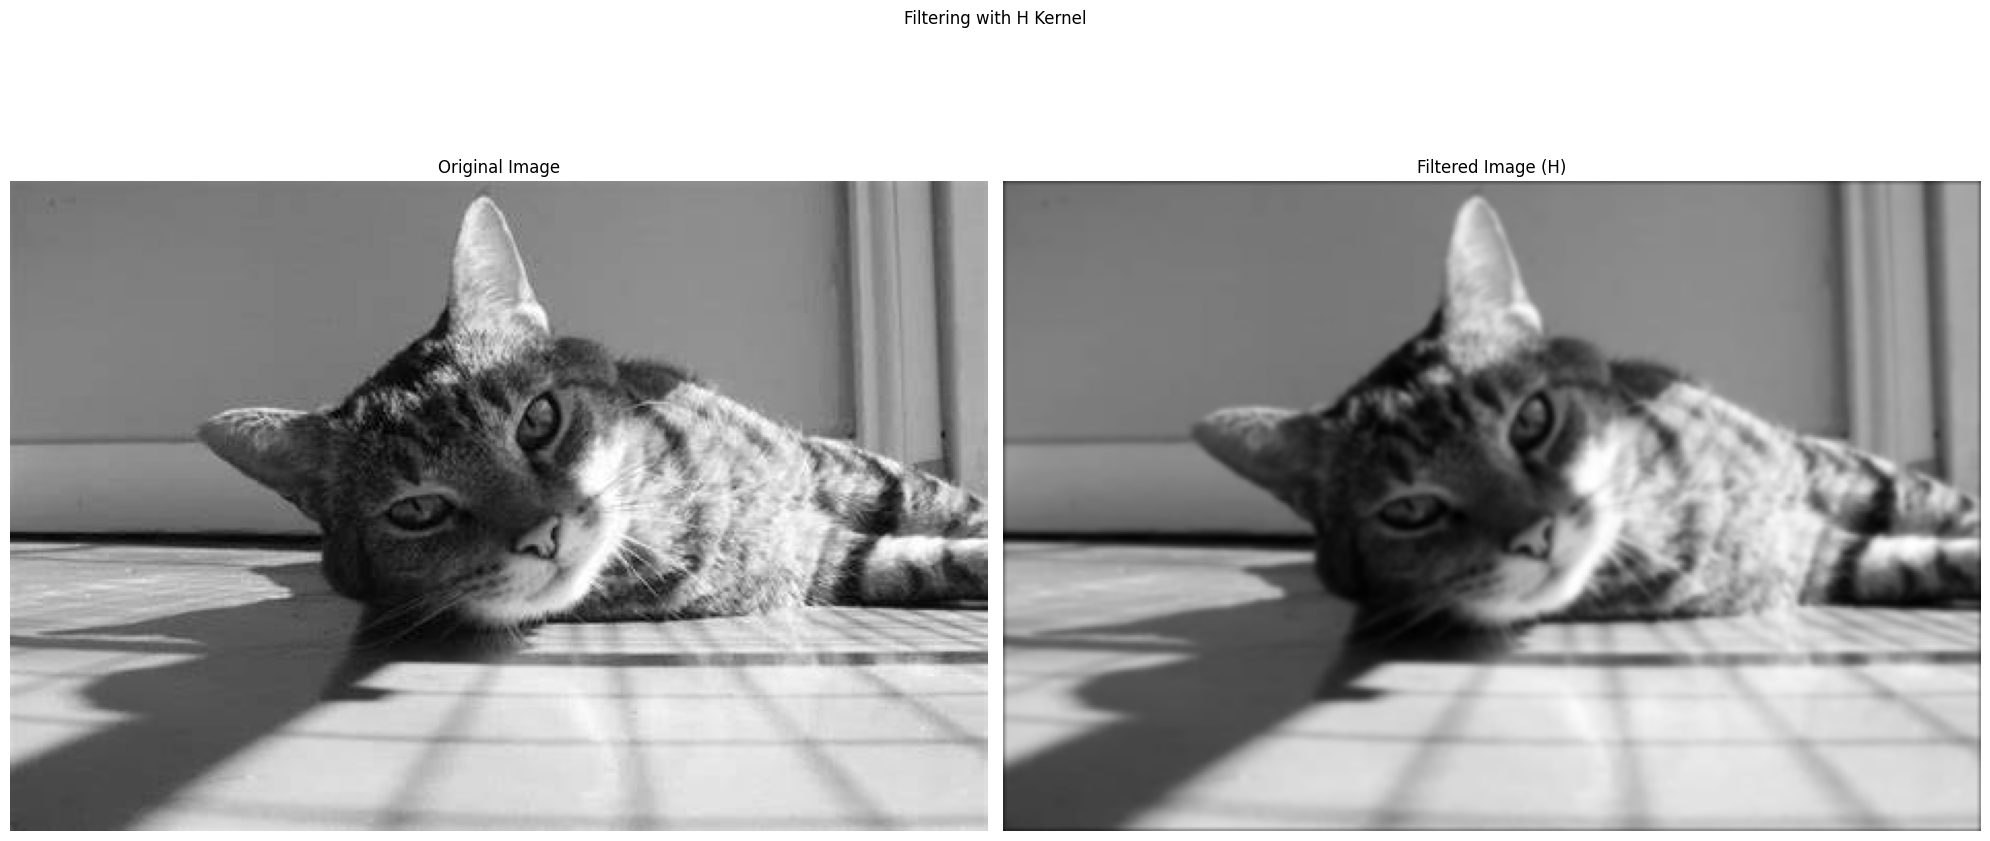

In [121]:
# Plot and display the original and filtered images
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Y_filteredH2, cmap='gray')
plt.title("Filtered Image (H)")
plt.axis('off')

plt.suptitle("Filtering with H Kernel")
plt.tight_layout()
plt.show()


In [122]:
# MSE of original gray imgaes
mean_intensity_original = np.mean(gray_image)
print("Mean intensity of the original image:", mean_intensity_original)
#Mean squared in Filtered image alone
mean_intensity_filtered = np.mean(Y_filteredH2)
print("Mean intensity of the filtered image:", mean_intensity_filtered)

# Calculate MSE (Mean Squared Error)
mse_value = mse(gray_image, Y_filteredH2)
print("MSE (Mean Squared Error) between Original and Filtered Image:", mse_value)

# Calculate SSIM (Structural Similarity Index)
ssim_value, _ = ssim(gray_image, Y_filteredH2, full=True, data_range=gray_image.max() - gray_image.min())
print("SSIM (Structural Similarity Index) between Original and Filtered Image:", ssim_value)

Mean intensity of the original image: 141.4788493737861
Mean intensity of the filtered image: 140.80677141517648
MSE (Mean Squared Error) between Original and Filtered Image: 73.42532299912932
SSIM (Structural Similarity Index) between Original and Filtered Image: 0.9262289419897799


In [123]:
# Compute Mean Squared Error (MSE)
mse_value = np.mean((Y_filteredF1 - Y_filteredH2) ** 2)
print(f'Mean Squared Error (MSE) between Y1 and Y3: {mse_value:.6f}')

# Compute Structural Similarity Index (SSIM)
ssim_value, _ = ssim(Y_filteredF1, Y_filteredH2, full=True, data_range=Y_filteredH2.max() - Y_filteredH2.min())
print(f'Structural Similarity Index (SSIM) between Y2 and Y3: {ssim_value:.6f}')

# Compute Mean Absolute Difference
mean_diff = np.mean(np.abs(Y_filteredF1 - Y_filteredH2))
print(f'Mean Absolute Difference between Y2 and Y3: {mean_diff:.6f}')

Mean Squared Error (MSE) between Y2 and Y3: 38.768426
Structural Similarity Index (SSIM) between Y2 and Y3: 0.960313
Mean Absolute Difference between Y2 and Y3: 2.629420


In [124]:
# Compute Mean Squared Error (MSE)
mse_value = np.mean((Y_filteredG1 - Y_filteredH2) ** 2)
print(f'Mean Squared Error (MSE) between Y2 and Y3: {mse_value:.6f}')

# Compute Structural Similarity Index (SSIM)
ssim_value, _ = ssim(Y_filteredG1, Y_filteredH2, full=True, data_range=Y_filteredH2.max() - Y_filteredH2.min())
print(f'Structural Similarity Index (SSIM) between Y2 and Y3: {ssim_value:.6f}')

# Compute Mean Absolute Difference
mean_diff = np.mean(np.abs(Y_filteredG1 - Y_filteredH2))
print(f'Mean Absolute Difference between Y2 and Y3: {mean_diff:.6f}')

Mean Squared Error (MSE) between Y2 and Y3: 19.063289
Structural Similarity Index (SSIM) between Y2 and Y3: 0.980653
Mean Absolute Difference between Y2 and Y3: 1.565895
